## Luis Omar Leyva Navarrete - A001540367

# Actividad M2

In [25]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pregunta 1
1. Sean tres puntos A = [1, 4, -3], B = [-2, 2, 1] y C = [3, -1, 4]:

* Q se determina escalando el punto A en X, Y y Z por un factor de 1.372 y trasladándolo con las coordenadas de B.

In [26]:
A = np.array([1,4,-3])
B = np.array([-2,2,1])
C = np.array([3,-1,4])

Q = A * 1.372

#Funcion translacion
def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

# Escalando y transladando
Qa = np.append(Q,1)
Q = np.matmul(translationMatrix(B), Qa)


print("Q =", str(Q))
print('from {} to {}'.format(Qa, Q))

Q = [-0.628  7.488 -3.116  1.   ]
from [ 1.372  5.488 -4.116  1.   ] to [-0.628  7.488 -3.116  1.   ]


* Rota el punto C, 37.2° con respecto al eje Y. Toma como punto pivote al punto Q.

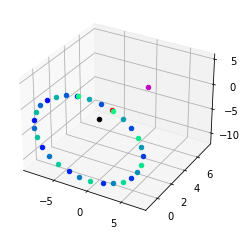

In [27]:
#Funcion rotacion
def rotationMatrix(angle_degrees, axis='x', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

C = np.append(C,1)
Q = np.delete(Q,3)
traM = translationMatrix(Q)
rotM = rotationMatrix(37.2,'y')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*Q, c='m')
ax.scatter(*C[:-1], c='r')

Caux = C
for color in plt.cm.winter(np.linspace(0, 1, 30)):
  # Translate from a point to the origin
  Caux = np.matmul(np.linalg.inv(traM), Caux)

  # Rotate
  Caux = np.matmul(rotM, Caux)

  # Translate from a point to the origin
  Caux = np.matmul(traM, Caux)

  ax.scatter(*Caux[:-1], color=color) 

plt.show()

# Pregunta 2
2. Considera una pirámide triangular regular. Su lado a = π y su altura h = (23−−√)a. La base de la pirámide está centrada en el punto D = (-2.345, -7.317, 1.328).

* Encuentra todos los vértices de la pirámide.

In [28]:
a = math.pi
h = math.sqrt(2/3) * a
D = (-2.345, -7.317, 1.328)



* Encuentra la nueva posición de cada vértice cuando la pirámide es rotada con respecto al eje Z por -23°. Usa como pivote el centroide de la pirámide (el centroide es el promedio de cada componente de cada vértice).